# Analyzing csv

## Read csv

In [1]:
import csv



file_name = "PT_16.csv"
dir_name = "pt_fixtures"

games = []

with open(dir_name +  "/" + file_name, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        row[2] = int(row[2])
        row[3] = int(row[3])
        games += [row]

print(len(games))
teams = []

for g in games:
    for i in range(0, 2):
        if(not g[i] in teams):
            teams += [g[i]]

153


## Compute how many goals difference each team has

In [2]:
goal_difference = dict(zip(teams, [0]*len(teams)))
goals_scored = dict(zip(teams, [0]*len(teams)))
goals_suffered = dict(zip(teams, [0]*len(teams)))
home_goals_scored = dict(zip(teams, [0]*len(teams)))
home_goals_suffered = dict(zip(teams, [0]*len(teams)))
away_goals_scored = dict(zip(teams, [0]*len(teams)))
away_goals_suffered = dict(zip(teams, [0]*len(teams)))

away_goal_difference = dict(zip(teams, [0]*len(teams)))
home_goal_difference = dict(zip(teams, [0]*len(teams)))

for g in games:
    goal_difference[g[0]] += g[2] - g[3]
    goal_difference[g[1]] += g[3] - g[2]
    
    goals_scored[g[0]] += g[2]
    goals_suffered[g[0]] += g[3]
    goals_scored[g[1]] += g[3]
    goals_suffered[g[1]] += g[2]
    
    home_goals_scored[g[0]] += g[2]
    home_goals_suffered[g[0]] += g[3]
    away_goals_scored[g[1]] += g[3]
    away_goals_suffered[g[1]] += g[2]
    
    away_goal_difference[g[1]] += g[3] - g[2]
    home_goal_difference[g[0]] += g[2] - g[3]
    

## Plot the goal difference of each team, as well as scored and suffered goals

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


goal_colors = []
goal_values = list(goal_difference.values())
for i in range(0, len(goal_values)):
    if(goal_values[i] > 0):
        goal_colors += ['g']
    else:
        goal_colors += ['r']

plt.title("Goal difference")
plt.xlabel("Goal difference")
plt.ylabel("Team")
plt.barh(list(goal_difference.keys()), goal_values, color=goal_colors)
plt.show()


plt.figure()
plt.title("Goal scored")
plt.xlabel("Goal scored")
plt.ylabel("Team")
plt.barh(list(goals_scored.keys()), list(goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered")
plt.xlabel("Goal suffered")
plt.ylabel("Team")
plt.barh(list(goals_suffered.keys()), list(goals_suffered.values()), color='b')
plt.show()


## Plot scored/suffered goals at home and away

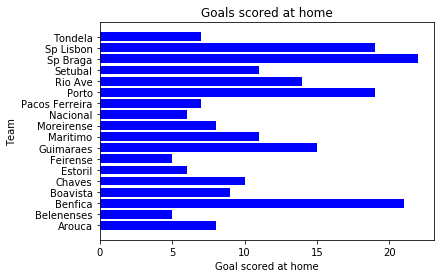

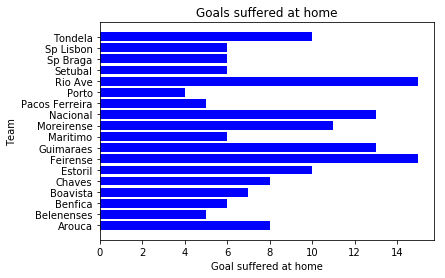

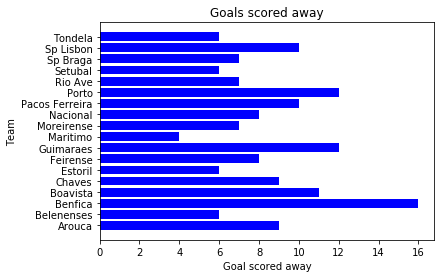

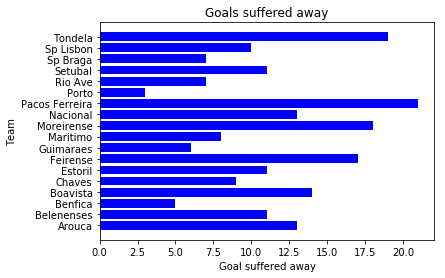

In [4]:

plt.figure()
plt.title("Goals scored at home")
plt.xlabel("Goal scored at home")
plt.ylabel("Team")
plt.barh(list(home_goals_scored.keys()), list(home_goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered at home")
plt.xlabel("Goal suffered at home")
plt.ylabel("Team")
plt.barh(list(home_goals_suffered.keys()), list(home_goals_suffered.values()), color='b')
plt.show()



plt.figure()
plt.title("Goals scored away")
plt.xlabel("Goal scored away")
plt.ylabel("Team")
plt.barh(list(away_goals_scored.keys()), list(away_goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered away")
plt.xlabel("Goal suffered away")
plt.ylabel("Team")
plt.barh(list(away_goals_suffered.keys()), list(away_goals_suffered.values()), color='b')
plt.show()

## Plot the goal difference home/away

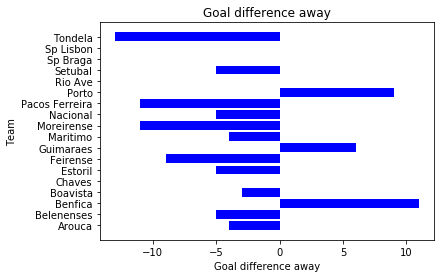

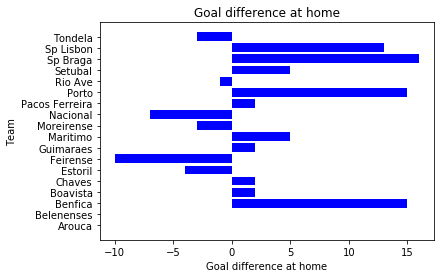

In [5]:
plt.figure()
plt.title("Goal difference away")
plt.xlabel("Goal difference away")
plt.ylabel("Team")
plt.barh(list(away_goal_difference.keys()), list(away_goal_difference.values()), color='b')
plt.show()

plt.figure()
plt.title("Goal difference at home")
plt.xlabel("Goal difference at home")
plt.ylabel("Team")
plt.barh(list(home_goal_difference.keys()), list(home_goal_difference.values()), color='b')
plt.show()

## Clustering

Applying PCA dimensionality reduction for 99% explainability of the data

In [6]:
features = []

for i in range(len(goal_difference.values())):
    features += [[list(goal_difference.values())[i],
                 list(goals_scored.values())[i],
                list(goals_suffered.values())[i],
                list(home_goal_difference.values())[i],
                list(home_goals_scored.values())[i],
                list(home_goals_suffered.values())[i],
                list(away_goal_difference.values())[i],
                list(away_goals_scored.values())[i],
                list(away_goals_suffered.values())[i]]]

    
features = np.array(features)

from sklearn.preprocessing import MaxAbsScaler


max_abs_scaler = MaxAbsScaler()
features = max_abs_scaler.fit_transform(features)


In [7]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=0.99) #number of components to explain 99% of the data
features_pca = pca.fit_transform(features)
print(features_pca)
"""
kernel_pca = KernelPCA(n_components=0.99, kernel='rbf')
features_kernel_pca = kernel_pca.fit(features)
print(features_kernel_pca)
"""

[[-2.47173487e-02  5.10542589e-01 -1.52051002e-03  3.07572423e-01]
 [ 1.70281554e+00  1.01414141e-02  1.07570136e-01 -1.08738594e-01]
 [-1.00785804e+00 -1.39596576e-01 -1.99259081e-01  9.01556154e-02]
 [-6.93512257e-01 -5.34532644e-01 -2.54067473e-01 -2.35709703e-01]
 [ 8.92635575e-01 -3.17885691e-01 -1.92535493e-01  1.06643801e-01]
 [ 6.87263006e-02 -2.52057235e-01  3.57199765e-01  1.43068004e-01]
 [-1.15874638e+00 -2.82954094e-01 -1.56032445e-01  9.23489894e-02]
 [ 1.84435920e+00  1.96571734e-01 -2.21022462e-01 -1.88462703e-01]
 [-8.27354778e-02 -4.11465983e-02 -8.41903244e-02 -2.26529438e-01]
 [-2.84680519e-01  1.12648101e-02  3.38171314e-02 -1.34995129e-01]
 [ 6.12820958e-01  6.52300561e-01 -9.88971792e-02  1.29248331e-02]
 [ 1.10722521e+00 -4.31513449e-01 -6.74071898e-02  3.44974049e-01]
 [-1.52122024e-02 -3.00165734e-01  1.60147359e-01  5.96967535e-02]
 [-3.55872926e-01 -1.57926657e-01  3.88931635e-01 -1.68584452e-01]
 [-6.16098065e-01  1.70297703e-01  2.38936219e-01 -5.66296920e

"\nkernel_pca = KernelPCA(n_components=0.99, kernel='rbf')\nfeatures_kernel_pca = kernel_pca.fit(features)\nprint(features_kernel_pca)\n"

Apllying Kmeans algorithm for k in range [2,10]

In [8]:
from sklearn.cluster import KMeans

kmeans = []
kmeans_predictions = []
for k in range(0, 9):
    kmeans += [KMeans(n_clusters=k+2, random_state=170)]
    
    kmeans[k].fit(features_pca)
    
    kmeans_predictions += [kmeans[k].predict(features_pca)]
    print("Score of k =", k+2, " is: ", kmeans[k].score(features_pca))


Score of k = 2  is:  -7.067303397510551
Score of k = 3  is:  -4.383068140059696
Score of k = 4  is:  -3.3448921331763213
Score of k = 5  is:  -2.372261954778635
Score of k = 6  is:  -1.6749820567716958
Score of k = 7  is:  -1.3598289821630982
Score of k = 8  is:  -1.14723934125494
Score of k = 9  is:  -0.835027601179326
Score of k = 10  is:  -0.5889103189704035


In [9]:
from sklearn.metrics import silhouette_score

for i in range(len(kmeans_predictions)):
    sil_score = silhouette_score(features_pca, kmeans_predictions[i])
    print("silhuotte score for k =", i+2, "is: ", sil_score)

silhuotte score for k = 2 is:  0.4948146403885781
silhuotte score for k = 3 is:  0.37449649267820634
silhuotte score for k = 4 is:  0.3544085301884655
silhuotte score for k = 5 is:  0.39737776768493427
silhuotte score for k = 6 is:  0.4020478404490709
silhuotte score for k = 7 is:  0.3151197971683365
silhuotte score for k = 8 is:  0.3166644992431925
silhuotte score for k = 9 is:  0.3174133733772719
silhuotte score for k = 10 is:  0.3338144901436547


Text(0.5,1,'Kmeans algorithm for k = 6')

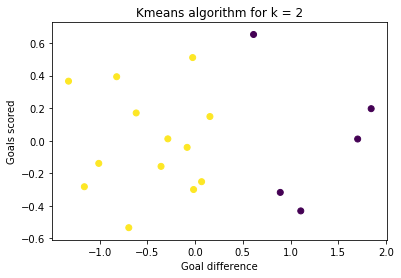

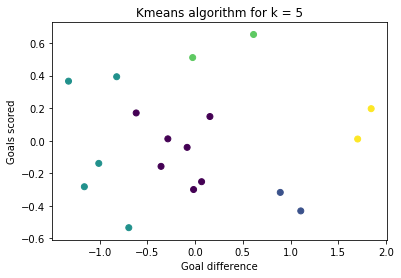

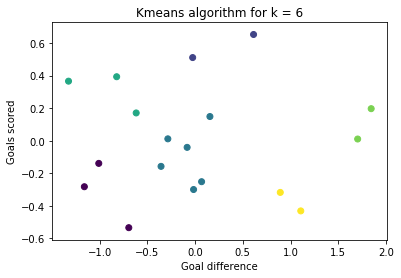

In [10]:
plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_predictions[0])
plt.xlabel("Goal difference")
plt.ylabel("Goals scored")
plt.title("Kmeans algorithm for k = 2")

plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_predictions[3])
plt.xlabel("Goal difference")
plt.ylabel("Goals scored")
plt.title("Kmeans algorithm for k = 5")

plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_predictions[4])
plt.xlabel("Goal difference")
plt.ylabel("Goals scored")
plt.title("Kmeans algorithm for k = 6")

# Organize game data with team data

In [12]:
data_kmeans_class = []

for g in range(len(games)):
    game = []
    
    game += [kmeans_predictions[4][teams.index(games[g][0])]]
    game += [kmeans_predictions[4][teams.index(games[g][1])]]
    
    
    if(games[g][2] - games[g][3] > 0):
        game += [1]
    elif(games[g][2] - games[g][3] < 0):
        game += [-1]
    else: 
        game += [0]
    
    
    data_kmeans_class += [game]

data_kmeans_class = np.array(data_kmeans_class)


#Create another set with the 0.99 n components explainability as the teams features

data_pca_features = []

for g in range(len(games)):
    game = []
    
    game += features_pca[teams.index(games[g][0])].tolist() + features_pca[teams.index(games[g][1])].tolist()
    
    
    if(games[g][2] - games[g][3] > 0):
        game += [1]
    elif(games[g][2] - games[g][3] < 0):
        game += [-1]
    else: 
        game += [0]

    game += [games[g][2] - games[g][3]]
    
    data_pca_features += [game]

data_pca_features = np.array(data_pca_features)

# Support Vector Machine classifier to predict game result

In [14]:
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

# spit the data into train and test set
X = data_pca_features[:,[0,1,2,3,4,5,6,7]]
y = data_pca_features[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Test linear kernel

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#make train predictions and see score


y_train_pred = clf.predict(X_train)

print("Train set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(y_train, y_train_pred))
print("Accuracy score: ", accuracy_score(y_train, y_train_pred))
print("Precision score: ", precision_score(y_train, y_train_pred, average='macro'))
print("Recall score: ", recall_score(y_train, y_train_pred, average='macro'))

#make test predictions and see score


y_test_pred = clf.predict(X_test)

print("\n\n\nTest set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(y_test, y_test_pred))
print("Accuracy score: ", accuracy_score(y_test, y_test_pred))
print("Precision score: ", precision_score(y_test, y_test_pred, average='macro'))
print("Recall score: ", recall_score(y_test, y_test_pred, average='macro'))


#Test rbf kernel

Train set prediction metrics



Mean absolute error:  0.45901639344262296
Accuracy score:  0.6475409836065574
Precision score:  0.5917065390749601
Recall score:  0.5648636466080684



Test set prediction metrics



Mean absolute error:  0.5483870967741935
Accuracy score:  0.6451612903225806
Precision score:  0.4341736694677871
Recall score:  0.5158730158730159


/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# TODO: predict game winners